In [1]:
#Analysing Amazon seller's sales data 

In [2]:
#Use Pandas(Data Manipultion library),NumPy(Numeric calculation library),Matplotlib(Visulaisation library in form of chart,graph etc.,)
#These library are very useful in dataanalysis
#NumPy is very fast ;Even Nasa uses if any calculation needed
#Matplotlib,Pandas library is built over NumPy because they contain function aldready there in NumPy
#Pandas can be visulaised as extremely powerful version of excel
#Heavy dataset in excel is unresponsive; pandas is useful at that time - to load large data set
#Matplotlib useful in 2D visualisations; can be seen as alternative to matlab
#numPy is base library ;many functions are inherited by pandas and matplotlib from NumPy

In [3]:
import pandas as pd

#csv -> comma separated variable

df = pd.read_csv('amazon_orders.csv')
df.head(10)

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,NaN
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,NaN
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,NaN
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,NaN
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,NaN
5,04/05/19,112-0000000-0000006,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/08/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$11.99,$0.00,$0.66,$0.00,$0.66,$12.65,Your Name,NaN
6,04/07/19,112-0000000-0000007,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/08/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$38.98,$0.00,$1.65,$0.00,$1.65,$40.63,Your Name,NaN
7,04/08/19,112-0000000-0000008,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/08/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,UPS(0002),$44.99,$0.00,$0.00,$0.00,$0.00,$44.99,Your Name,NaN
8,04/20/19,112-0000000-0000009,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/21/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$27.30,$0.00,$1.50,$0.00,$1.50,$28.80,Your Name,NaN
9,04/23/19,112-0000000-0000010,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/24/19,Your Name,1 YOUR STREET,NaN,ANYTOWN,ME,00001-0001,Shipped,UPS(0002),$37.08,$0.00,$0.00,$0.00,$0.00,$37.08,Your Name,NaN


In [4]:
df.shape

(59, 23)

In [6]:
#Cleaning Data 
#Cleaning the data is an important part of most data analysis projects, and we’ll need to do a little bit of data cleaning here before we can do our analysis and find out the total sum we’ve spent on Amazon.

#Let’s start by dealing with those NaN values. We need to do some math with our data, but 1 + NaN is a tough math problem to solve. NaN, after all, isn’t a number! Since NaN represents the absence of information, let’s just fill in all of those NaN values using pandas’s handy df.fillna() function. This allows us to automatically replace every NaN value with something else. In this case, let’s replace NaN with the number zero.

#We need to be a little careful here, though. We don’t just want to replace those values temporarily! We want to replace them and then store that version of the DataFrame as our new DataFrame. We’ll use df = df.fillna(0) to replace the values and re-define our df variable to point to that new dataframe.

#Then, we’ll use the .head() function again to make sure our changes worked.

In [5]:
#we check how many null values are there
df.isnull().sum()

Order Date                         0
Order ID                           0
Payment Instrument Type            0
Website                            0
Purchase Order Number             59
Ordering Customer Email            0
Shipment Date                      0
Shipping Address Name              0
Shipping Address Street 1          0
Shipping Address Street 2         59
Shipping Address City              0
Shipping Address State             0
Shipping Address Zip               0
Order Status                       0
Carrier Name & Tracking Number     0
Subtotal                           0
Shipping Charge                    0
Tax Before Promotions              0
Total Promotions                   0
Tax Charged                        0
Total Charged                      0
Buyer Name                         0
Group Name                        59
dtype: int64

In [7]:
#we can fill those column with NaN value with zero
#removing NaN value is imp process of data cleaning
df = df.fillna(0)
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,0.0


In [11]:
#remove dollar sign and convert prize from string to float
#df["Total Charged"] = df["Total Charged"].str.replace('$','').astype(float)
df["Total Charged"] = df["Total Charged"].astype(float)
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,14.99,Your Name,0.0


In [12]:
df["Total Charged"].sum()

1777.7300000000002

In [13]:
#mean is the average in maths 
df["Total Charged"].mean()

30.131016949152542

In [14]:
#median is the middle number after arranging in asc/desc
df["Total Charged"].median()

15.95

In [16]:
df["Total Charged"].min()

1.04

In [17]:
df["Total Charged"].max()

210.99

In [18]:
df["Total Charged"].mode()

0    12.99
dtype: float64

In [19]:
df["Tax Charged"] = df["Tax Charged"].str.replace('$','').astype(float)
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,1.93,36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,0.00,16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,0.00,9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,8.14,156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,0.00,14.99,Your Name,0.0


In [20]:
df["Tax Charged"].sum()

52.60999999999999

In [21]:
df["Tax Charged"].sum() / df["Total Charged"].sum()

0.02959392033660904

In [22]:
#Analyzing Amazon Spending Over Time
#datetime object used
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,2019-04-01,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,1.93,36.93,Your Name,0.0
1,2019-04-01,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,0.00,16.99,Your Name,0.0
2,2019-04-01,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,0.00,9.99,Your Name,0.0
3,2019-04-04,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,8.14,156.12,Your Name,0.0
4,2019-04-05,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,ANYTOWN,ME,00001-0001,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,0.00,14.99,Your Name,0.0


In [23]:
#Visulaisation and analysation using graph
#print graph below code (not print in popup)
%matplotlib inline

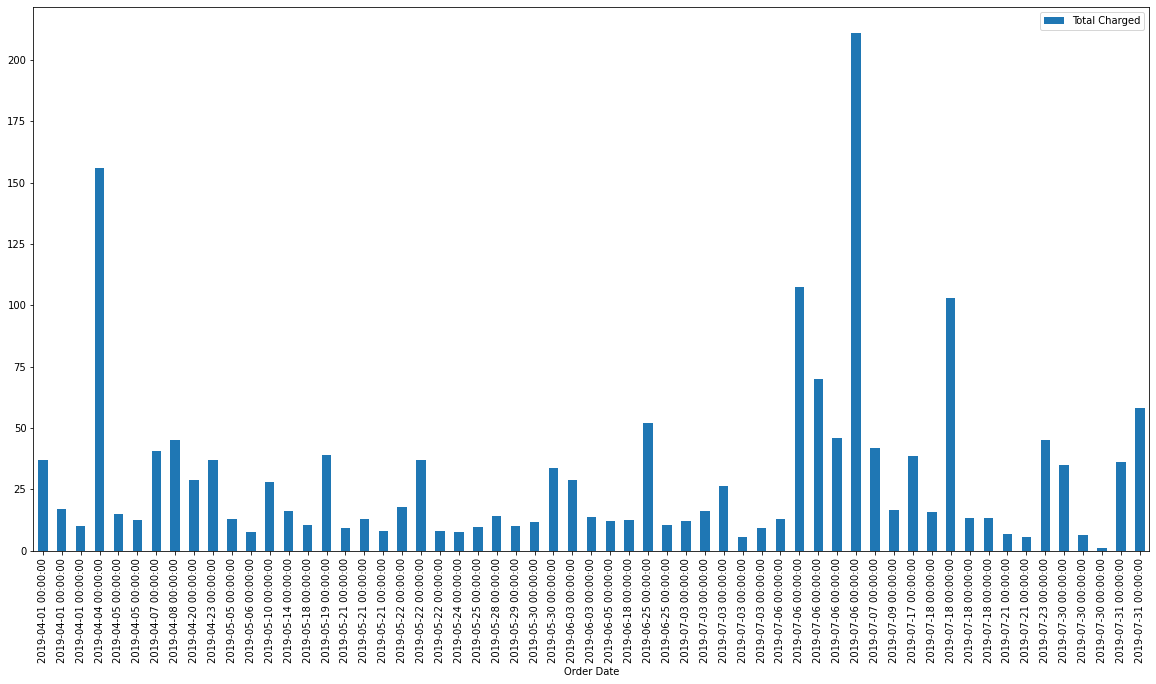

In [27]:
#Bar graph (represents the frequency)
df.plot.bar(x='Order Date', y='Total Charged', rot=90, figsize=(20,10))
#rotation = 90 degree so that text are visible

In [29]:
#Grouping orders based on orderdate;orders on same day will be grouped together
daily_orders = df.groupby('Order Date').sum()["Total Charged"]
daily_orders.head()

Order Date
2019-04-01     63.91
2019-04-04    156.12
2019-04-05     27.64
2019-04-07     40.63
2019-04-08     44.99
Name: Total Charged, dtype: float64

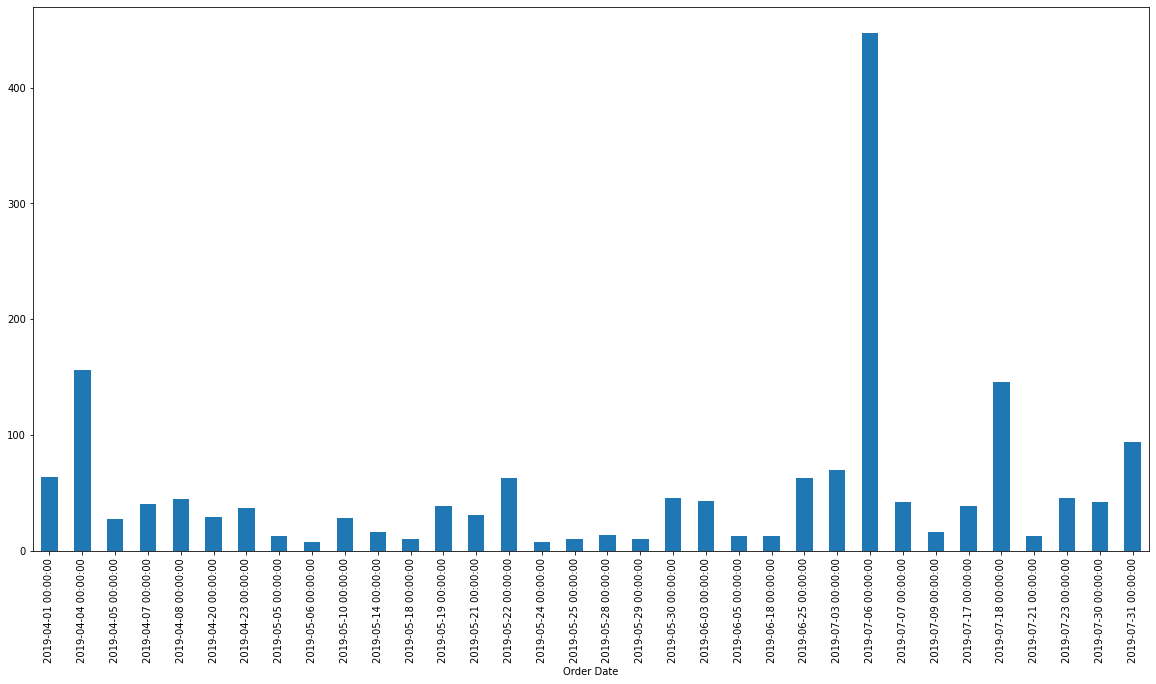

In [30]:
daily_orders.plot.bar(figsize=(20,10))

In [ ]:
#Thankyou :)